## Gathering Data form External CSV File 

In [244]:
#import libraries and load dataset

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pylab as plt
import seaborn as sns

df=pd.read_csv('./tmdb-movies.csv')

    

# Define Question
>> #### Is there any correlation between budget and revenue?

>> #### What are the top 10 revenue categories based on genres?

>> #### What are the top 10 movies in terms of revenue from ten years ago?

>> #### How does the result from the previous question compare to the revenue of the same movies in the last year?

>> #### How do budget and revenue compare over the last ten years?

>> #### Is there any correlation between vote_count and budget_ads, reflecting people's satisfaction?

>> #### Is there any correlation between budget_adj and revenue_adj, and what is the magnitude of the difference?



In [245]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


#  data Wrangling >  data Gathering >  data Assessting > data cleaning 




In [246]:
#deleted columns that's we don't need it 
df.drop(['cast','overview','tagline'],axis=1,inplace=True)

In [247]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [248]:
#counts rows and columns 
df.shape

(10866, 18)

In [249]:
#info for check datatype incorrect and misssing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   keywords              9373 non-null   object 
 9   runtime               10866 non-null  int64  
 10  genres                10843 non-null  object 
 11  production_companies  9836 non-null   object 
 12  release_date          10866 non-null  object 
 13  vote_count            10866 non-null  int64  
 14  vote_average          10866 non-null  float64
 15  release_year       

### data cleaning

> * there is missing data in ['homepage','tagline','keywords','production_companies','genres','director','imdb_id']
 
> * we have to optimize the dataset its 1.6+ MB like ['runtime','vote_count','vote_average']
 
> * to more optimize dataset we have to change datatype of some column to category datatype like ['geners','production_companies']
 
> * we have to change incorrect datatype like ['release_date']

In [250]:
df.homepage.unique()

array(['http://www.jurassicworld.com/', 'http://www.madmaxmovie.com/',
       'http://www.thedivergentseries.movie/#insurgent', ...,
       'http://www.animalhouse.com/',
       'http://www.mgm.com/#/our-titles/1092/The-Last-Waltz/',
       'http://en.wikipedia.org/wiki/Hooper_(film)'], dtype=object)

In [251]:
#first remove duplecates rows 
df.duplicated().sum()

1

In [252]:
#remove duplicated data
df.drop_duplicates(inplace=True)

In [253]:
#recheck if we removed duplecates rows 
df.duplicated().sum()

0

In [254]:
#dealing with missing data  
df.dropna(how='any',axis=0,inplace=True)

In [255]:
#change datatype for incorrct datatype columns and optimize dataset to reduce the size of dataset
df['genres']= df['genres'].astype('category')
df['production_companies']= df['production_companies'].astype('category')
df['release_date'] = pd.to_datetime(df['release_date'])


In [256]:
#optimize more column from int64 and float64
df['runtime']= df['runtime'].astype('int8')
df['vote_count']= df['vote_count'].astype('int32')
df['vote_average']= df['vote_average'].astype('float32')


df.info()

## Exploratory Data Analysis (EDA)


In [257]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,homepage,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,http://www.jurassicworld.com/,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,http://www.madmaxmovie.com/,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,android|spaceship|jedi|space opera|3d,-120,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,http://www.furious7.com/,James Wan,car race|speed|revenge|suspense|car,-119,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09


> ## Is there any correlation between budget and revenue?

In [258]:
#calculate Correltion between budget and revenue 
correlation_matrix=df['budget'].corr(df['revenue'])
correlation_matrix

0.7556517416104743

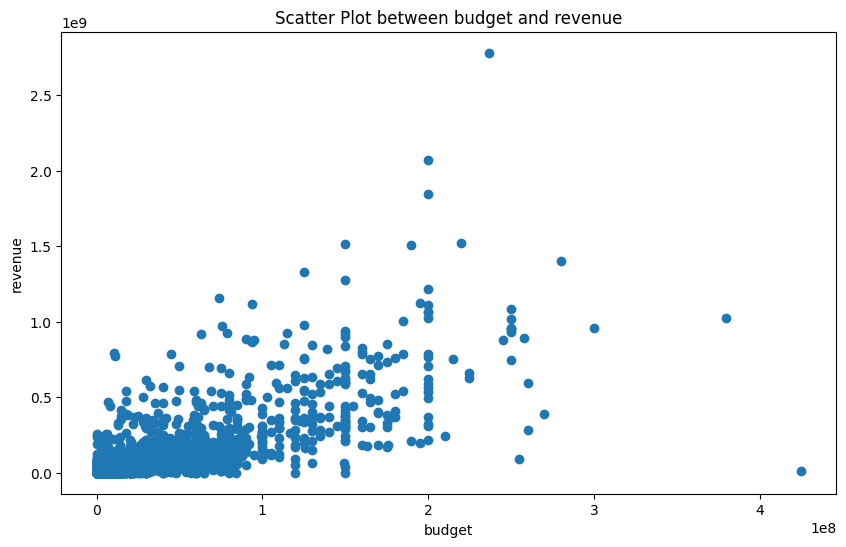

In [259]:
#visualize the relationship between budget and revenue 
plt.figure(figsize=(10,6))
plt.scatter(df['budget'],df['revenue'])
plt.xlabel('budget')
plt.ylabel('revenue')
plt.title('Scatter Plot between budget and revenue')
plt.show()

In [260]:


# Calculate the correlation
correlation_value = df['budget'].corr(df['revenue'])

# Insert the conclusion based on the correlation
if correlation_value > 0:
    conclusion = f"There is a positive correlation of {correlation_value:.2f} between 'budget' and 'revenue'. This suggests that, on average, higher budget allocations are associated with higher revenue."
elif correlation_value < 0:
    conclusion = f"There is a negative correlation of {correlation_value:.2f} between 'budget' and 'revenue'. This suggests that, on average, higher budget allocations are associated with lower revenue."
else:
    conclusion = "There is no significant correlation between 'budget' and 'revenue'. This suggests that the budget allocations and revenue are not strongly related."


conclusion


"There is a positive correlation of 0.76 between 'budget' and 'revenue'. This suggests that, on average, higher budget allocations are associated with higher revenue."

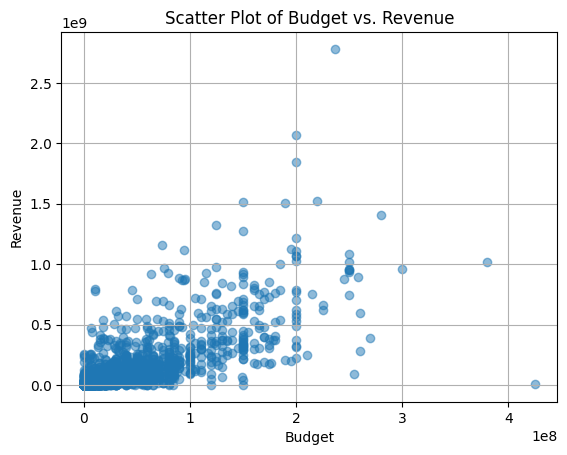

In [261]:
# Scatter plot
plt.scatter(df['budget'], df['revenue'], alpha=0.5)
plt.title('Scatter Plot of Budget vs. Revenue')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.grid(True)
plt.show()

### answer Q1 : is there any correlation between budget and revenue?
>> #### There is a positive correlation of 0.76 between 'budget' and 'revenue'. This suggests that, on average, higher budget allocations are associated with higher revenue.

> ## What are the top 10 revenue categories based on genres?

In [262]:
df_sorted_revenue=df.groupby('genres')['revenue'].nlargest(10).reset_index()
df_sorted_revenue_d=pd.DataFrame(df_sorted_revenue)
df_sorted_revenue_d


,genres,level_1,revenue
0,Action,25,682330139
1,Action,1938,310669540
2,Action,6260,162944923
3,Action,1975,136000000
4,Action,1456,87784194
...,...,...,...
1660,War|Drama|History|Action,715,154984035
1661,War|Drama|History|Thriller,1563,0
1662,Western,7443,70016220
1663,Western|Animation|Family|Comedy|Music,7046,103951461


In [263]:
#now sum the value group by genres to find the highest revenue and use idxmax 
total_revenue_by_genre=df_sorted_revenue_d.groupby('genres')['revenue'].sum()
total_revenue_by_genre

genres
Action                                               1567297806
Action|Adventure                                        7500000
Action|Adventure|Animation                                    0
Action|Adventure|Animation|Family                             0
Action|Adventure|Animation|Family|Science Fiction     631442092
                                                        ...    
War|Drama|History|Action                              154984035
War|Drama|History|Thriller                                    0
Western                                                70016220
Western|Animation|Family|Comedy|Music                 103951461
Western|Drama|Adventure|Thriller                      532950503
Name: revenue, Length: 774, dtype: int64

In [264]:
#new dataframe to plot the date from series total_revenue_by_genres

plt_total_revenue_by_genre=pd.DataFrame(total_revenue_by_genre).reset_index()
plt_total_revenue_by_genre.columns=['Genres','Total_Revenue']
plt_genres_revenue=plt_total_revenue_by_genre.sort_values(by='Total_Revenue',ascending=False).head(10)
plt_genres_revenue


,Genres,Total_Revenue
192,Adventure|Fantasy|Action,7380147493
143,Adventure|Action|Science Fiction,4839902747
33,Action|Adventure|Science Fiction,4657777088
29,Action|Adventure|Fantasy|Science Fiction,4474490465
244,Animation|Family,3981404005
204,Adventure|Fantasy|Family,3801753979
145,Adventure|Action|Thriller,3612469413
659,Science Fiction|Action|Adventure,3245494492
107,Action|Science Fiction|Adventure,3234256634
382,Drama,2993328535


Genres                                    Total_Revenue
Action|Adventure|Fantasy|Science Fiction  4474490465       1
Action|Adventure|Science Fiction          4657777088       1
Action|Science Fiction|Adventure          3234256634       1
Adventure|Action|Science Fiction          4839902747       1
Adventure|Action|Thriller                 3612469413       1
Adventure|Fantasy|Action                  7380147493       1
Adventure|Fantasy|Family                  3801753979       1
Animation|Family                          3981404005       1
Drama                                     2993328535       1
Science Fiction|Action|Adventure          3245494492       1
dtype: int64


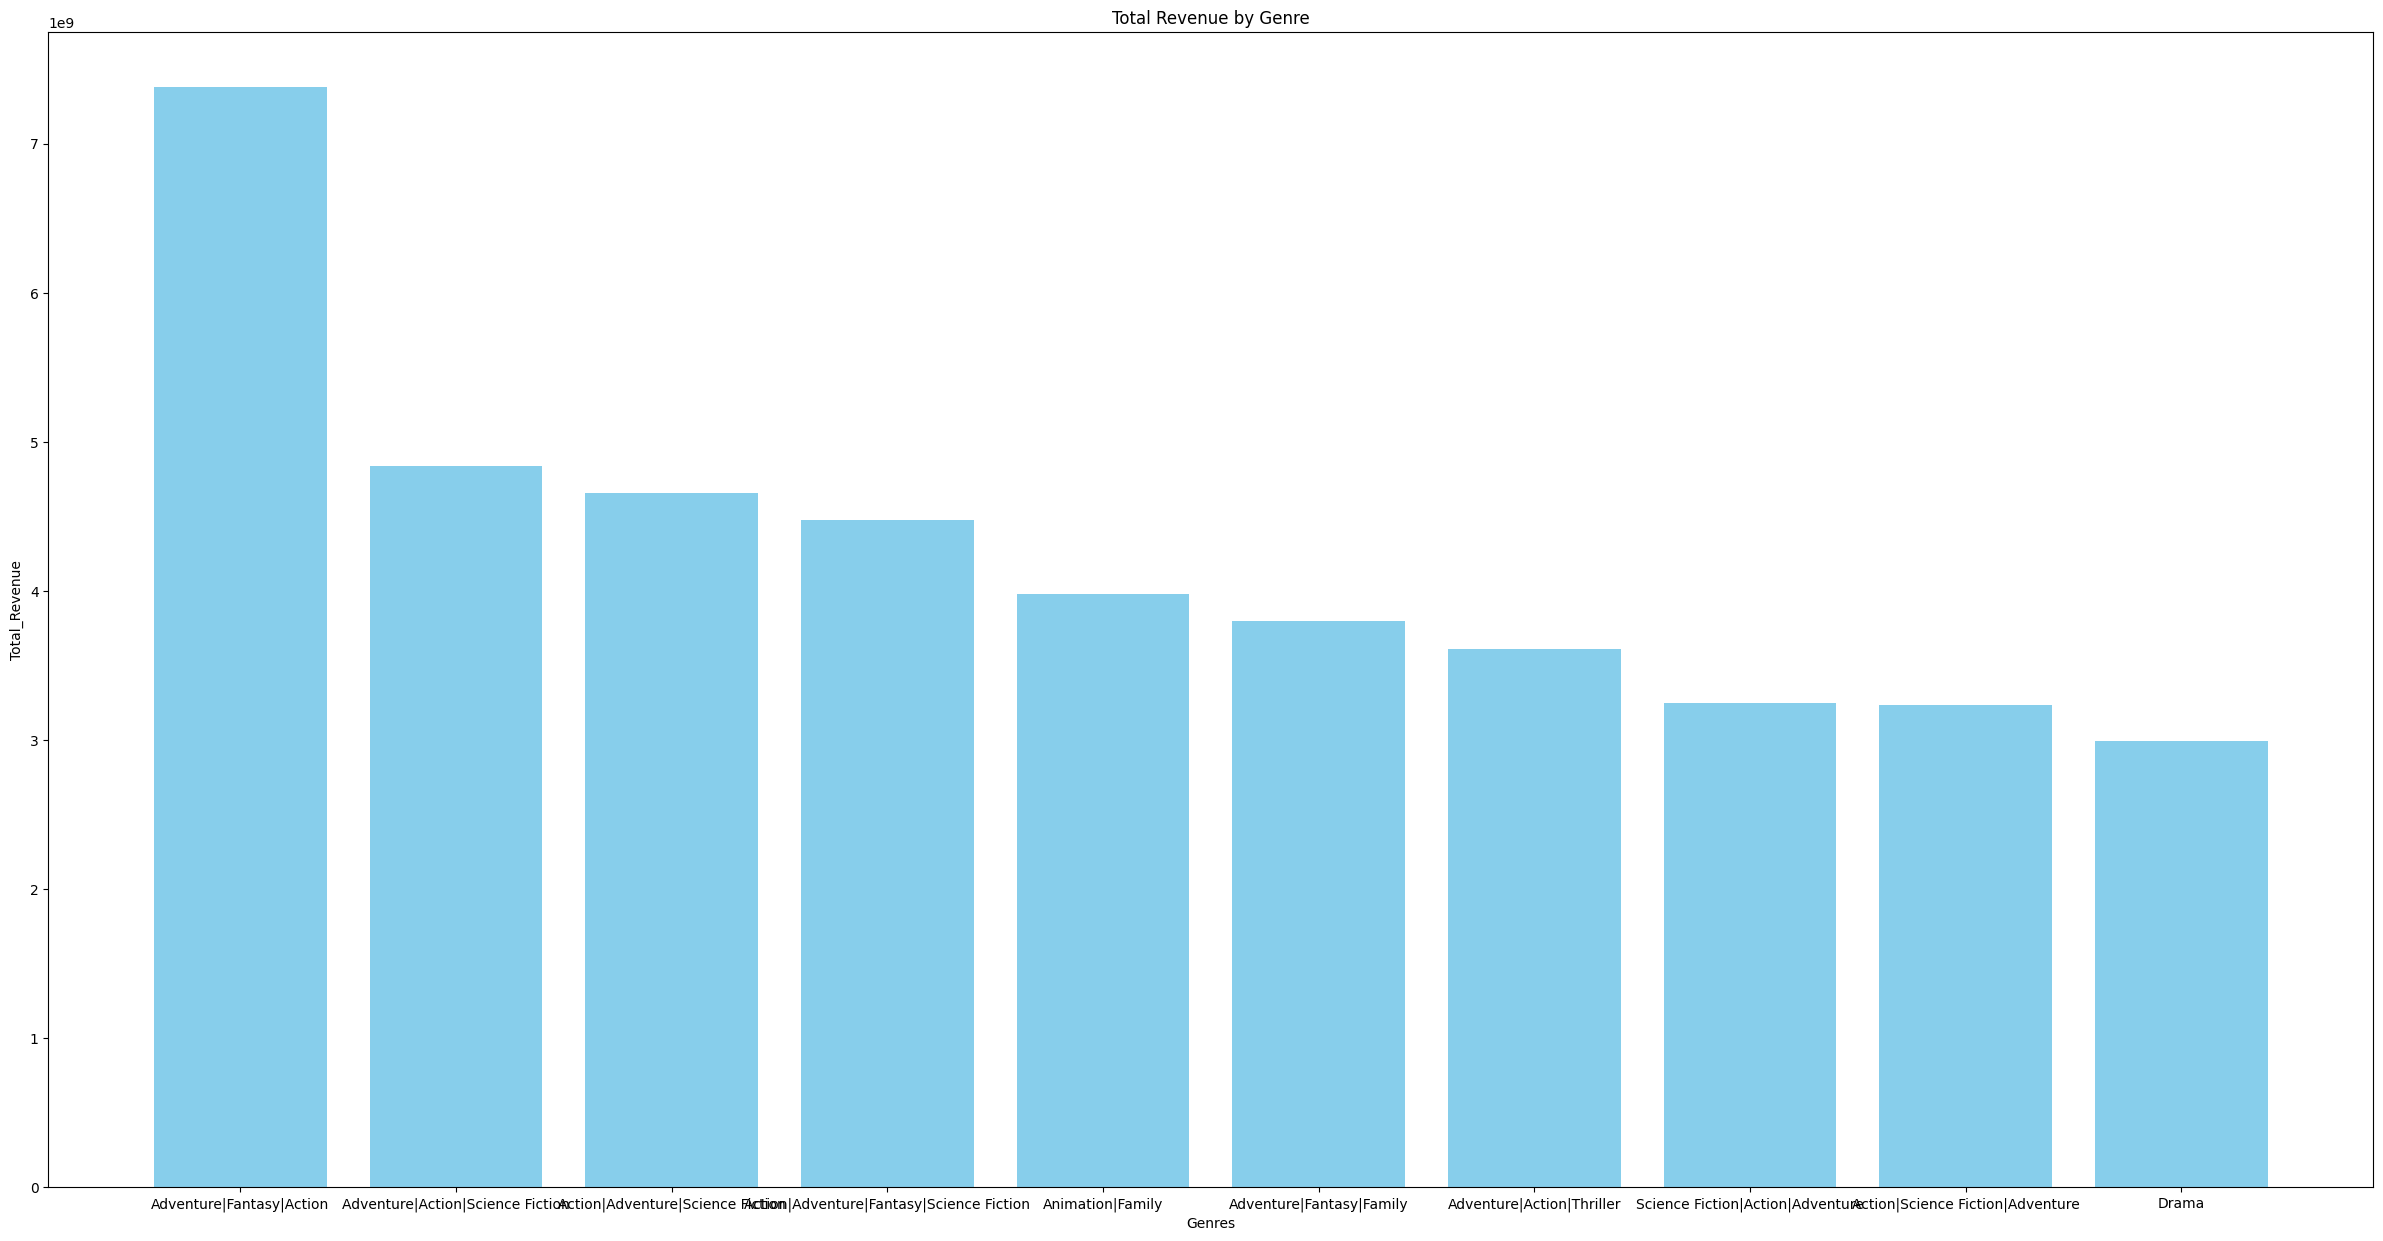

In [265]:
print(plt_genres_revenue.value_counts())
plt.figure(figsize=(30, 15))
plt.bar(plt_genres_revenue['Genres'], plt_genres_revenue['Total_Revenue'], color='skyblue')
plt.title('Total Revenue by Genre')
plt.xlabel('Genres')
plt.ylabel('Total_Revenue')
plt.show()

 ## What are the top 10 revenue categories based on genres??
> #### Action                                              
> #### Action|Adventure                                      
> #### Action|Adventure|Animation                                    
> #### Action|Adventure|Animation|Family                             
> #### Action|Adventure|Animation|Family|Science Fiction     
> #### War|Drama|History|Action                           
> #### War|Drama|History|Thriller                                    
> #### Western                                               
> #### Western|Animation|Family|Comedy|Music                 
> #### Western|Drama|Adventure|Thriller   
 

In [266]:
plt_genres_revenue.head(1)

,Genres,Total_Revenue
192,Adventure|Fantasy|Action,7380147493


## What are the top 10 movies in terms of revenue from ten years ago?
> ## Adventure|Fantasy|Action

### What are the top 10 movies in terms of revenue from ten years ago?

In [267]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 0 to 10819
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    2413 non-null   int64         
 1   imdb_id               2413 non-null   object        
 2   popularity            2413 non-null   float64       
 3   budget                2413 non-null   int64         
 4   revenue               2413 non-null   int64         
 5   original_title        2413 non-null   object        
 6   homepage              2413 non-null   object        
 7   director              2413 non-null   object        
 8   keywords              2413 non-null   object        
 9   runtime               2413 non-null   int8          
 10  genres                2413 non-null   category      
 11  production_companies  2413 non-null   category      
 12  release_date          2413 non-null   datetime64[ns]
 13  vote_count       

In [268]:
#target year in df.year columns befor ten years from now 
current_year=2015
target_year=current_year-10
df_ten_years_movies=df[df['release_year']==target_year]
#make dataframe for id ,imdb_id,original_title and revenue
selected_columns_of_ten_movies=df_ten_years_movies[['id','imdb_id','release_year','original_title','revenue']]
df_ten_years_movies_result=selected_columns_of_ten_movies.sort_values(by='revenue',ascending=False).head(10) # sort_values => to get revenue from highest value
df_ten_years_movies_result

,id,imdb_id,release_year,original_title,revenue
6190,674,tt0330373,2005,Harry Potter and the Goblet of Fire,895921036
6196,1895,tt0121766,2005,Star Wars: Episode III - Revenge of the Sith,850000000
6191,272,tt0372784,2005,Batman Begins,374218673
6208,9982,tt0371606,2005,Chicken Little,314432665
6201,561,tt0360486,2005,Constantine,230427240
6213,1495,tt0320661,2005,Kingdom of Heaven,211643158
6280,7552,tt0369441,2005,Fun with Dick and Jane,202026112
6232,533,tt0312004,2005,The Curse of the Were-Rabbit,192452832
6219,142,tt0388795,2005,Brokeback Mountain,178043761
6198,1635,tt0399201,2005,The Island,162949164


## Frozen Movie was the highest revenue in 2013

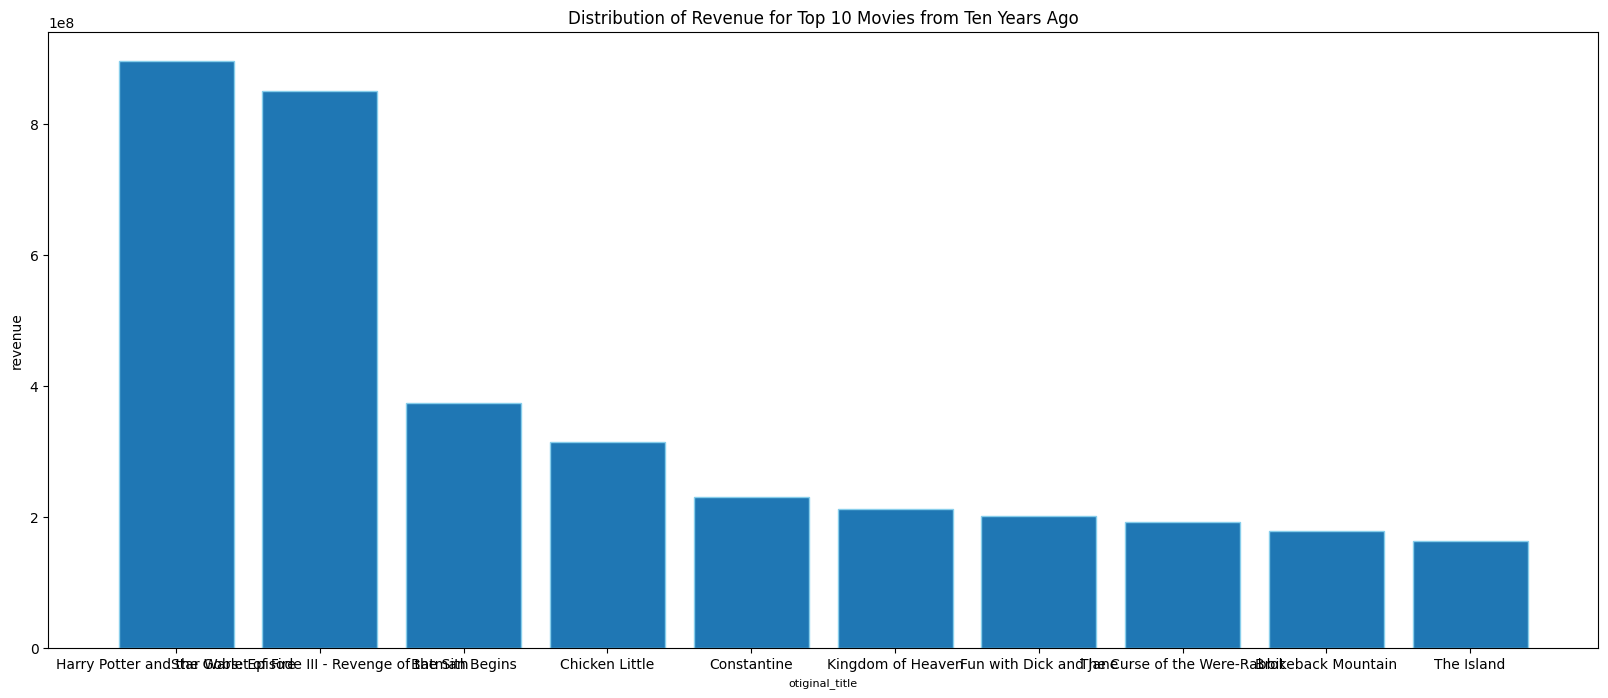

In [269]:

plt.figure(figsize=(20, 8));
plt.bar(df_ten_years_movies_result['original_title'],df_ten_years_movies_result['revenue'], edgecolor='skyblue');
plt.title('Distribution of Revenue for Top 10 Movies from Ten Years Ago');
plt.xlabel('otiginal_title',fontsize=8);
plt.ylabel('revenue');
plt.show();


## How does the result from the previous question compare to the revenue of ?


In [270]:
#we will repeat the last Question and do it for last year 2015 in datasets
df_movies_2015=df[df['release_year']==2015]
selected_columns_of_ten_movies_last_year=df_movies_2015[['id','imdb_id','release_year','original_title','revenue']]
df_ten_years_movies_result_2015=selected_columns_of_ten_movies_last_year.sort_values(by='revenue',ascending=False).head(10)
df_ten_years_movies_result_2015


,id,imdb_id,release_year,original_title,revenue
3,140607,tt2488496,2015,Star Wars: The Force Awakens,2068178225
0,135397,tt0369610,2015,Jurassic World,1513528810
4,168259,tt2820852,2015,Furious 7,1506249360
14,99861,tt2395427,2015,Avengers: Age of Ultron,1405035767
8,211672,tt2293640,2015,Minions,1156730962
10,206647,tt2379713,2015,Spectre,880674609
9,150540,tt2096673,2015,Inside Out,853708609
25,177677,tt2381249,2015,Mission: Impossible - Rogue Nation,682330139
19,131634,tt1951266,2015,The Hunger Games: Mockingjay - Part 2,650523427
7,286217,tt3659388,2015,The Martian,595380321


In [271]:
#we need to concat the two dataframe

merged_df=pd.concat([df_ten_years_movies_result,df_ten_years_movies_result_2015])
merged_df_sum=pd.DataFrame(merged_df.groupby('release_year')['revenue'].sum(),columns=['revenue']).reset_index()

merged_df_sum

,release_year,revenue
0,2005,3612114641
1,2015,11312340229


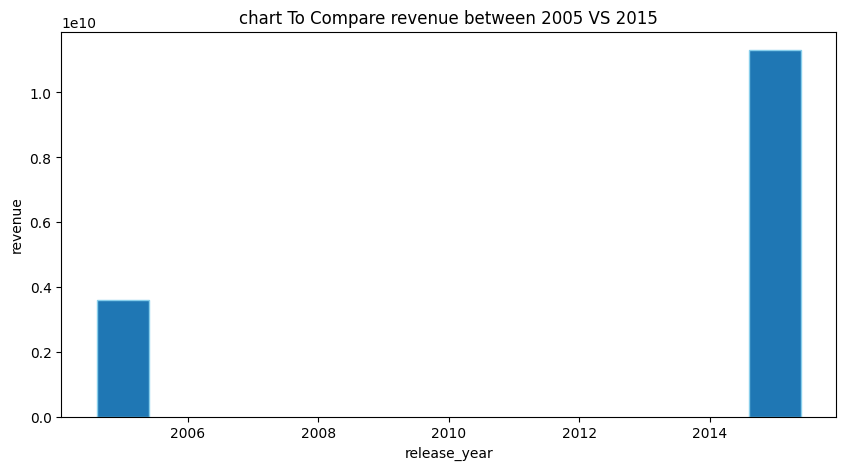

In [272]:
# now we will compare the 20
plt.figure(figsize=(10,5));
plt.bar(merged_df_sum['release_year'],merged_df_sum['revenue'], edgecolor='skyblue');
plt.title('chart To Compare revenue between 2005 VS 2015');
plt.xlabel('release_year');
plt.ylabel('revenue');
plt.show();

>> #### An insightful observation is evident in the data, revealing a remarkable increase of over one billion dollars in total revenue for the top 10 movies in 2015. This substantial rise underscores the considerable success and financial impact of these films during that particular year 

## How do budget and revenue compare over the last ten years?

In [273]:

# Assuming you have already filtered the data for the last ten years


merged_df_budget_revenue=df.groupby(by='release_year')[['budget','revenue']].sum()
merged_df_budget_revenue
merged_compare=merged_df_budget_revenue.sort_values(by='release_year',ascending=False).head(10)
merged_compare.columns



Index(['budget', 'revenue'], dtype='object')

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


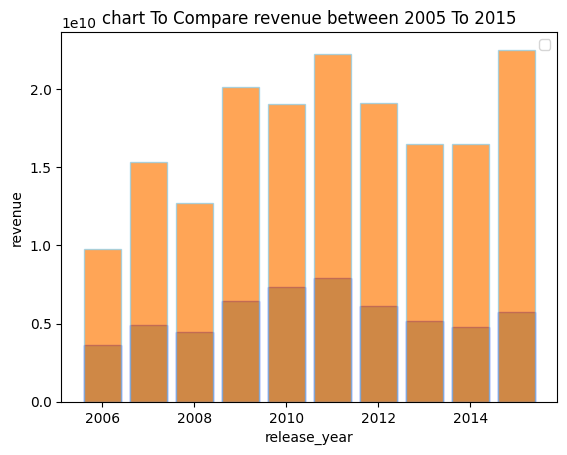

In [274]:

plt.bar(merged_compare.index,merged_compare['budget'], edgecolor='blue',alpha=0.7);
plt.bar(merged_compare.index,merged_compare['revenue'], edgecolor='skyblue',alpha=0.7);
plt.title('chart To Compare revenue between 2005 To 2015');
plt.xlabel('release_year');
plt.ylabel('revenue');
plt.legend()
plt.show();

>> #### The observed upward trend in revenue from 2005 to 2015 highlights a substantial increase. Unlike revenue, which depicts a positive trajectory, the budget appears to be independent of costs and not directly related to revenue.

>> #### A closer examination of the budget data for 2014 and 2013 reveals an interesting pattern. The budget in 2013 is higher than that in 2014, indicating fluctuations in investment decisions over these two years.

>> #### It's noteworthy that the budget represents only a quarter of the revenue, suggesting that movies' investments have proven to be sound choices. This further emphasizes the profitability and success of these cinematic ventures.

## Is there any correlation between vote_count and budget_ads, reflecting people's satisfaction?

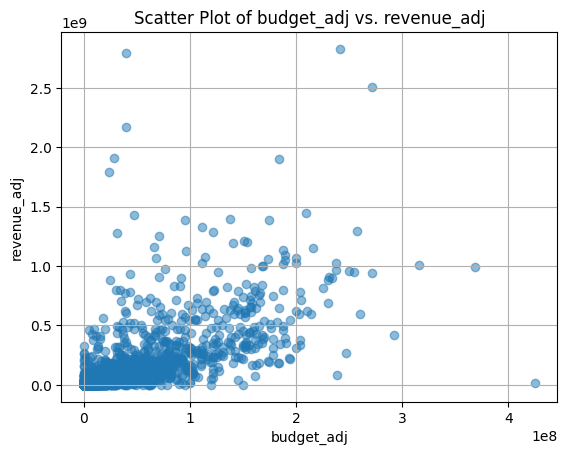

The positive correlation of 0.68 suggests a generally favorable relationship, where higher investments tend to yield higher returns.
The magnitude of the difference between `budget_adj` and `revenue_adj` averages at 84162243.91, highlighting the financial dynamics between budget and revenue.


In [275]:





# Scatter plot
plt.scatter(df['budget_adj'], df['revenue_adj'], alpha=0.5)
plt.title('Scatter Plot of budget_adj vs. revenue_adj')
plt.xlabel('budget_adj')
plt.ylabel('revenue_adj')
plt.grid(True)
plt.show()

# Insert interpretation
correlation = 0.6816177552284475
difference_magnitude = 84162243.91391516

# Scatter plot interpretation
if correlation > 0:
    interpretation = f"The positive correlation of {correlation:.2f} suggests a generally favorable relationship, where higher investments tend to yield higher returns."
elif correlation < 0:
    interpretation = f"The negative correlation of {correlation:.2f} indicates a potentially challenging dynamic, where higher investments may not necessarily lead to higher returns."
else:
    interpretation = "There is no significant correlation between `budget_adj` and `revenue_adj`."

# Magnitude of the difference interpretation
magnitude_interpretation = f"The magnitude of the difference between `budget_adj` and `revenue_adj` averages at {difference_magnitude:.2f}, highlighting the financial dynamics between budget and revenue."

# Print the interpretations
print(interpretation)
print(magnitude_interpretation)


>> ### After analyzing the data, we found a positive correlation of approximately 0.68 between budget_adj and revenue_adj, suggesting a generally favorable relationship. This implies that, on average, higher investments in movies tend to correspond with higher returns. Additionally, the magnitude of the difference between budget_adj and revenue_adj averages at approximately $84.16 million, highlighting the financial dynamics between budget and revenue. These insights provide valuable information for decision-making in budget planning and revenue forecasting within the context of the analyzed dataset.